# Práctica 5: Grafos

Para ayudarse a resolver, leer la documentación del paquete [networkx](https://networkx.org/documentation/stable/reference/index.html)

In [1]:
!pip install networkx

# en vscode: python -m pip install networkx

Mostrar un grafo por pantalla y que quede bien dibujado [es un problema dificil. ](https://en.wikipedia.org/wiki/Force-directed_graph_drawing) Utilizaremos la siguiente función para dibujar grafos.

In [18]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_graph(G):
    """
    Funcion auxiliar para imprimir los grafos con los que trabajemos
    El peso de las aristas, si los hay, debe estar en el atributo 'weight'
    """
    pos=nx.spring_layout(G)
    nx.draw_networkx_nodes(G,pos)
    edge_labels=dict([((u,v,),d.get('weight', ''))
             for u,v,d in G.edges(data=True)])
    nx.draw_networkx_labels(G,pos, font_size=20,font_family='sans-serif')
    nx.draw_networkx_edges(G,pos)
    plt.axis('off')
    #nx.draw_networkx_labels(self.G,pos, font_size=20,font_family='sans-serif')
    nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
    nx.draw(G, pos, edge_cmap=plt.cm.Reds)

    plt.show()

**Ejercicio 1** Construir una función que dado $n$, construya $K_n$, el grafo completo de $n$ vértices, utilizando networkx. Probar la función construyendo el grafo $K_5$ y graficarlo.




In [19]:
def grafo_Kn(n: int):
    """
    Construye un grafo completo Kn.
    """
    G = nx.Graph()

    # crear una lista de tamaño n con los nodos del grafo
    nodos = list(range(n))

    # agregar los nodos al grafo
    G.add_nodes_from(nodos)

    # agregar las aristas del grafo recorriendo la lista de nodos
    for i in nodos:
        for j in nodos:
            if i < j:   # no se repiten aristas ni se generan bucles
                G.add_edge(i, j)

    return G

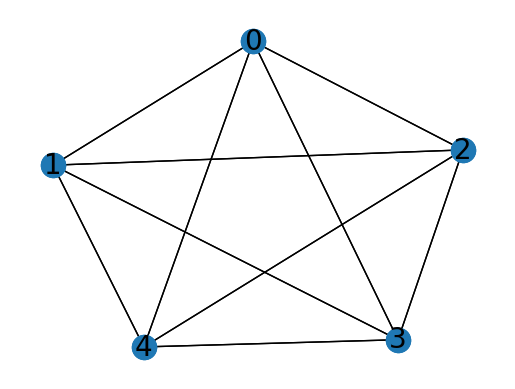

In [ ]:
G = grafo_Kn(5)
plot_graph(G)

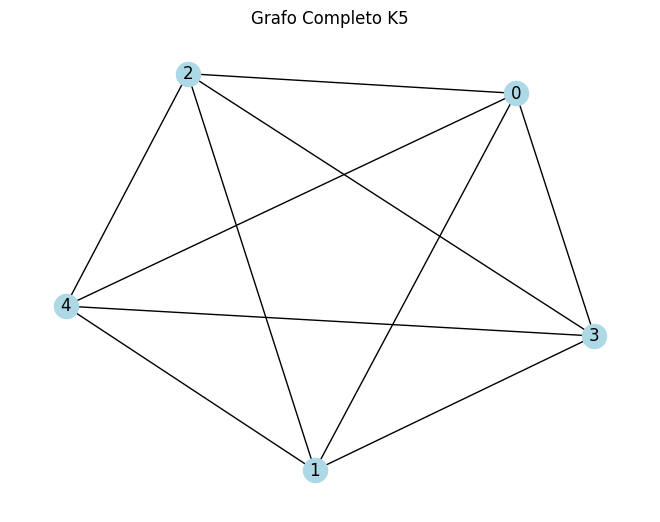

In [ ]:
G = grafo_Kn(5)

nx.draw(G, with_labels=True, node_color='lightblue', edge_color='black')
plt.title("Grafo Completo K5")
plt.show()

**Ejercicio 2** Construir una función que dados $n$ y $m$, construya $K_{n, m}$, el grafo bipartito completo de $n$ y $m$ vértices, utilizando networkx. Probar la función construyendo el grafo $K_{2,3}$ y graficar.




In [20]:
def grafo_Knm(n: int, m: int):
    """
    Construye un grafo bipartito completo Knm.
    """
    G = nx.Graph()

    # crear una lista desde 0 hasta n-1 nodos
    V1 = list(range(n))
    # crear una lista desde n hasta n+m nodos para evitar que sean iguales
    V2 = list(range(n, n+m))

    # agregar los nodos al grafo
    G.add_nodes_from(V1, bipartite = 0) # nodos que pertenecen al conjunto V1
    G.add_nodes_from(V2, bipartite = 1) # nodos que pertenecen al conjunto V2

    # agregar las aristas del grafo recorriendo las listas de nodos
    for i in V1:
        for j in V2:
            G.add_edge(i, j)

    return G

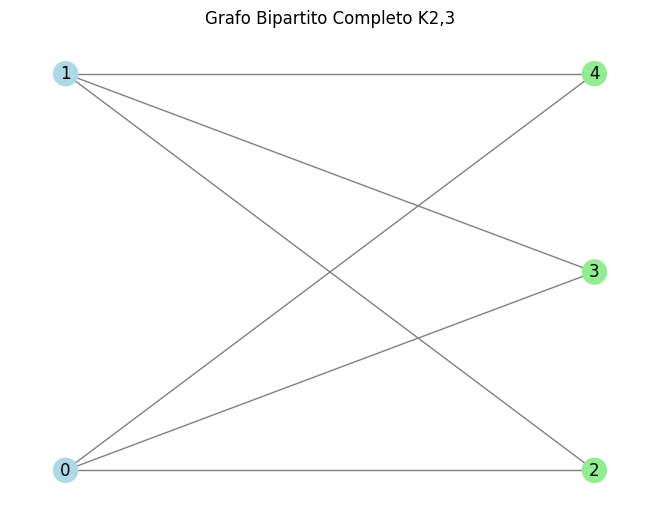

In [ ]:
# Para graficar:
n = 2
m = 3
G = grafo_Knm(n, m)

# Crear una lista con nodos del primer conjunto bipartito
V1 = list(range(n))
# Crear una lista con nodos del segundo conjunto bipartito
V2 = list(range(n, n+m))

# Dibujar el grafo usando el layout bipartito
pos = nx.bipartite_layout(G, V1)
nx.draw(G, pos, with_labels=True, node_color=['lightblue' if n in V1 else 'lightgreen' for n in G.nodes()], edge_color='gray')
plt.title(f"Grafo Bipartito Completo K{n},{m}")
plt.show()

**Ejercicio 3** El [grafo camino](https://es.wikipedia.org/wiki/Grafo_camino) de $n$ vértices, normalmente notado $P_n$, es el grafo de $n$ vértices colocados formando un camino.

Formalmente, $P_n = (V, E)$ donde:

- $ V = \{v_1, v_2, ..., v_n\} $
- $ E = \{ (v_i, v_{i+1}) | i = 1, ..., n -1 \} $

Escribir una función que reciba n y construya $P_n$ utilizando networkx. Probar la función construyendo el grafo $P_6$ y graficarlo.

In [21]:
def grafo_camino(n: int):
    """
    Construye un grafo camino Pn
    """
    G = nx.Graph()
    nodos = list(range(n))

    G.add_nodes_from(nodos)

    for i in nodos:
        for j in nodos:
            if j == i + 1:
                G.add_edge(i, j)
    return G

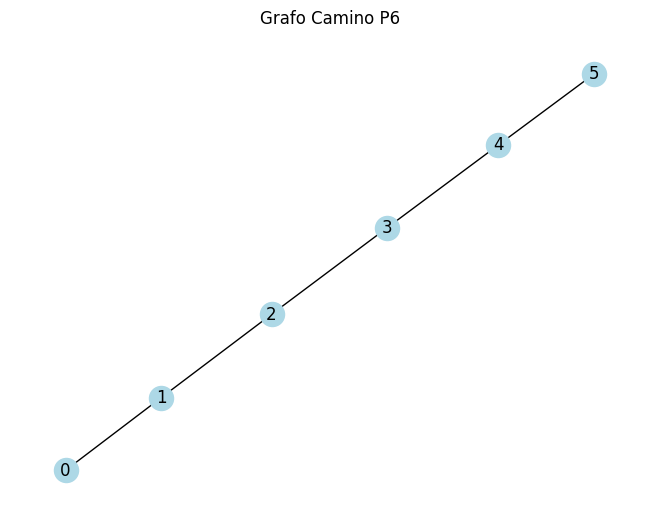

In [22]:
G = grafo_camino(6)

nx.draw(G, with_labels=True, node_color='lightblue', edge_color='black')
plt.title("Grafo Camino P6")
plt.show()

**Ejercicio 4** El [grafo ciclo](https://es.wikipedia.org/wiki/Grafo_ciclo) de $n$ vértices, normalmente notado $C_n$, es un grafo de $n$ vértices ubicados formando un ciclo.

Formalmente, $C_n = (V, E)$ donde:

- $ V = \{v_1, v_2, ..., v_n\} $
- $ E = \{ (v_i, v_{i+1}) | i = 1, ..., n -1 \} \cup \{(v_n, v_1)\} $

Escribir una función que reciba $n$ y construya $C_n$. Probar la función construyendo $C_5$ y graficar.

In [23]:
def grafo_ciclo(n: int):
    """
    Construye un grafo ciclo Cn.
    """
    G = nx.Graph()
    nodos = list(range(n))

    G.add_nodes_from(nodos)

    for i in nodos:
        # '(i+1) % n' asegura que cuando llegue al ultimo nodo,
        # el siguiente sea el primer nodo, cerrando el ciclo
        G.add_edge(i, (i+1) % n)

    return G


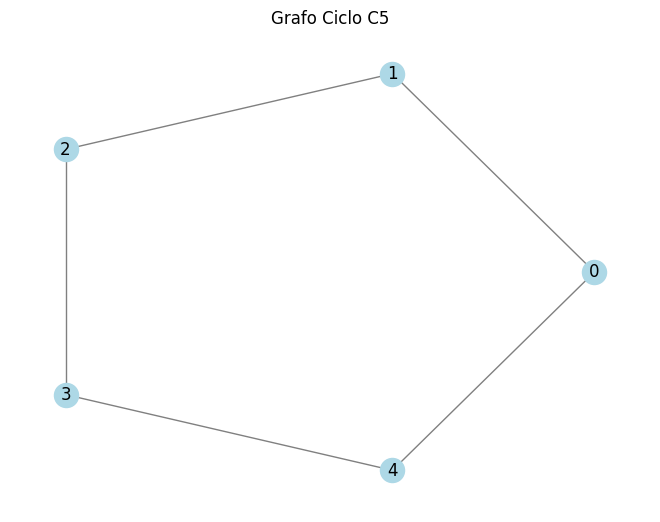

In [24]:
G = grafo_ciclo(5)

# Dibujar el grafo
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', pos=nx.circular_layout(G))
plt.title("Grafo Ciclo C5")
plt.show()

**Ejercicio 5** El [grafo rueda](https://es.wikipedia.org/wiki/Grafo_rueda) de $n$ vértices, notado $W_n$, es un grafo de $n$ vértices, donde $n-1$ vértices forman un ciclo y un vértice adicional se une a todos esos vértices.

Formalmente, $C_n = (V, E)$ donde:

- $ V = \{v_1, v_2, ..., v_n\} $
- $ E = \{ (v_i, v_{i+1}) | i = 1, ..., n -2 \} \cup \{(v_{n-1}, v_1)\} \cup \{ (v_n, v_i) | i = 1, ..., n-1 \} $

Dar un función que reciba $n$ y construya $W_n$. Probar la función construyendo el grafo $W_6$ y graficarlo.

In [27]:
def grafo_rueda(n: int):
    """
    Construye un grafo rueda Wn.
    """
    if n < 4:
        print("El grafo debe tener 4 vertices como minimo")
        return

    G = nx.Graph()
    # los vertices del ciclo seran desde el 0 hasta el n - 2
    nodos_ciclo = list(range(n-1))
    # el nodo central sera el ultimo vertice
    nodo_central = n - 1

    # agregar los nodos al grafo
    G.add_nodes_from(nodos_ciclo)
    G.add_node(nodo_central)

    # agregar las aristas del ciclo
    for i in range (n - 2):
        G.add_edge(i, (i + 1))
    G.add_edge(n - 2, 0)  # cierra el ciclo

    # conectar el nodo central con todos los nodos del ciclo
    for i in range (n - 1):
        G.add_edge(nodo_central, i)

    return G

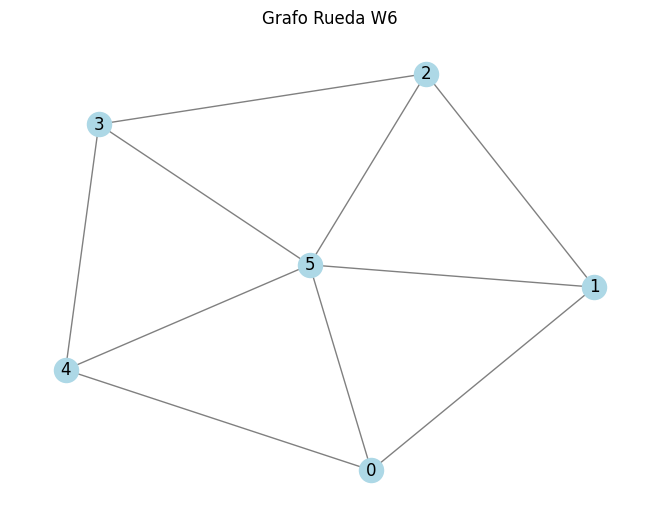

In [31]:
G = grafo_rueda(6)

# Dibujar el grafo
pos = nx.spring_layout(G)  # Usamos el layout spring para una mejor visualización
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("Grafo Rueda W6")
plt.show()

**Ejercicio 6**: Realizar una función que dado un grafo, cuente el número de nodos y aristas que tiene el grafo. No utlice los metodos `number_of_nodes` ni `number_of_edges`. Al finalizar, utilice estos metodos para verificar que su implementación es correcta.

In [42]:
from networkx import Graph
def contar_nodos_aristas(G: Graph):
    """
    Devuelve la cantidad de nodos y aristas que tiene un grafo.
    """
    nodos = len(G.nodes)
    aristas = len(G.edges)

    return nodos, aristas

In [48]:
G = grafo_Kn(6)

cant_nodos, cant_aristas = contar_nodos_aristas(G)
print("Cantidad de nodos:", cant_nodos)
print("Cantidad de aristas:", cant_aristas)
print("Cantidad de nodos networkx:", G.number_of_nodes())
print("Cantidad de aristas networkx:", G.number_of_edges())

Cantidad de nodos: 6
Cantidad de aristas: 15
Cantidad de nodos networkx: 6
Cantidad de aristas networkx: 15


**Ejercicio 7**: Ejecutar (a mano) el algoritmo de Dijkstra para encontrar la ruta más corta del vértice $a$ al vértice $z$.

Luego, utilizar `networkx` para verificar la respuesta.

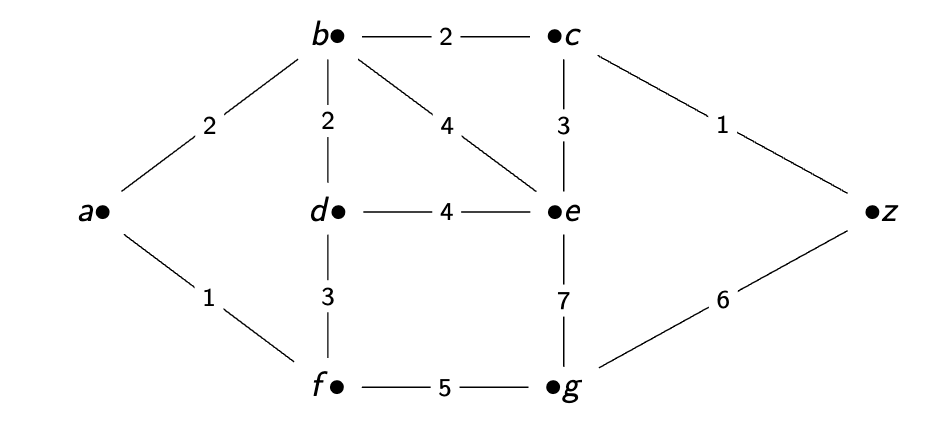mismo.



In [52]:
G = nx.Graph()
G.add_nodes_from('abcdefgz')
G.add_edge('a', 'b', weight=2)
G.add_edge('a', 'f', weight=1)
G.add_edge('b', 'c', weight=2)
G.add_edge('b', 'd', weight=2)
G.add_edge('b', 'e', weight=4)
G.add_edge('c', 'e', weight=3)
G.add_edge('c', 'z', weight=1)
G.add_edge('d', 'e', weight=4)
G.add_edge('d', 'f', weight=3)
G.add_edge('e', 'g', weight=7)
G.add_edge('f', 'g', weight=5)
G.add_edge('g', 'z', weight=6)

# ejecutar el algoritmo de Dijkstra desde el nodo a
distancias = nx.single_source_dijkstra_path_length(G, source='a')

print("Distancias mas cortas desde el nodo a:")
for objetivo, distancia in distancias.items():
    print(f"Distancia a {objetivo}: {distancia}")

Distancias mas cortas desde el nodo a:
Distancia a a: 0
Distancia a f: 1
Distancia a b: 2
Distancia a d: 4
Distancia a c: 4
Distancia a z: 5
Distancia a g: 6
Distancia a e: 6


In [50]:
G = nx.Graph()
G.add_nodes_from('abcdefgz')
G.add_edge('a', 'b', weight=2)
G.add_edge('a', 'f', weight=1)
G.add_edge('b', 'c', weight=2)
G.add_edge('b', 'd', weight=2)
G.add_edge('b', 'e', weight=4)
G.add_edge('c', 'e', weight=3)
G.add_edge('c', 'z', weight=1)
G.add_edge('d', 'e', weight=4)
G.add_edge('d', 'f', weight=3)
G.add_edge('e', 'g', weight=7)
G.add_edge('f', 'g', weight=5)
G.add_edge('g', 'z', weight=6)

# ejecutar el algoritmo de Dijkstra desde el nodo a
distancias, rutas = nx.single_source_dijkstra(G, source='a')

print("Distancias mas cortas desde el nodo a:")
for objetivo, distancia in distancias.items():
    print(f"Distancia a {objetivo}: {distancia}")

print("\nCaminos mas cortos desde el nodo a:")
for objetivo, ruta in rutas.items():
    print(f"Camino a {objetivo}: {ruta}")


Distancias mas cortas desde el nodo a:
Distancia a a: 0
Distancia a f: 1
Distancia a b: 2
Distancia a d: 4
Distancia a c: 4
Distancia a z: 5
Distancia a g: 6
Distancia a e: 6

Caminos mas cortos desde el nodo a:
Camino a a: ['a']
Camino a b: ['a', 'b']
Camino a f: ['a', 'f']
Camino a d: ['a', 'f', 'd']
Camino a g: ['a', 'f', 'g']
Camino a c: ['a', 'b', 'c']
Camino a e: ['a', 'b', 'e']
Camino a z: ['a', 'b', 'c', 'z']


**Ejercicio 8**: Ejecutar el algoritmo de búsqueda en profundidad (DFS) sobre el grafo $K_n$ para algún $n$ a su elección y utilizar `networkx` para confirmar su resultado. Hacer una conjetura sobre el resultado de ejecutar DFS sobre $K_n$ para cualquier $n$.

**Ejercicio 9** Unos ambiciosos ingenieros tienen pensado construir una gran ciudad a
partir de unos planos que elaboraron.

El plano de la ciudad consta de N esquinas y M calles bidireccionales.

Cada calle une a lo mas a dos equinas.

Se dice que existe un camino que une a dos esquinas v y w, si v = w, si hay
una calle conectando directamente a las dos esquinas, o si existe una secuencia
de esquinas $a_1$, $a_2$, $a_3$, ..., $a_k$, tal que $a_1$ = v, $a_k$ = w, y toda $a_i$ (menos $a_k$) está
unida directamente con $a_{i+1}$ por una calle.

Los ingenieros se preguntan si habrán planifcado mal algo, como por ejemplo,
que si una persona vive en una esquina A y quiere ir a visitar a un amigo
que vive en una esquina B, no exista un camino que le permita llegar a la
esquina B.

a. Dado N (la cantidad de esquinas) y M (la cantidad de calles) y una lista de tuplas Representar este problema como un grafo.

b. Escribir una función que reciba dicho grafo y devuelva el número de pares de esquinas para la cual no existe un camino entre ellas. Por ejemplo, para los datos de ejemplo, debe devolver 6.

In [ ]:
# Ejemplo:

N = 5
M = 3

calles = [
    (1,2),
    (2,4),
    (3,5)
]

# ...